In [1]:
!pip install seaborn scikit-learn --quiet 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
import pandas as pd
import numpy as np
from math import sqrt
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from src.load_data import import_json
from src.preprocessing_data import calculate_moving_avg_and_count, filter_by_threshold_second_limit
from src.linreg_model import *
from src.visualisation import *
from src.currentglucosemodel import CurrentGlucoseModel
from src.export_data import export_metrics

Metrics and parameters successfully appended to results/model_performance_parameters.json
{'mae': 0.16942485332723617,
 'mse': 0.038686405949410925,
 'rms': 0.19668860147301603,
 'r2': 0.9973608497578066,
 'coefficient': 0.42407477011951283,
 'intercept': 0.8157530024066109}


c:\Users\Kirsty.Fraser\Documents\SAVA_DS\src\visualisation.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


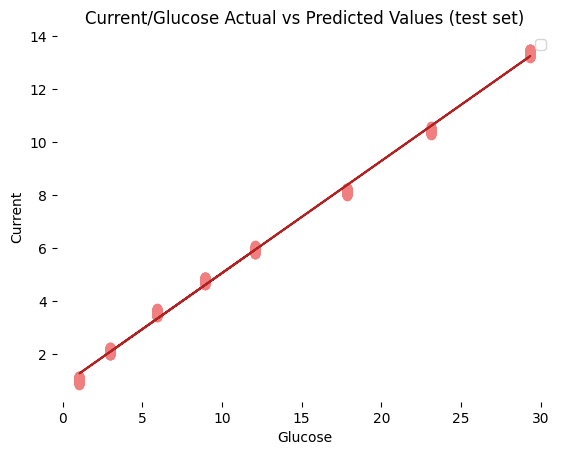

In [4]:
# 1. Initialize CurrentGlucoseModel
model = CurrentGlucoseModel()

# 2. Load data
file_path = "data/raw_data.json"
model.import_json(file_path)

# 3. Preprocess data (moving average and filtering)
window_size = 200
threshold = 0.2
seconds_after = 200
model.preprocess_data(window=window_size, threshold=threshold, seconds_after=seconds_after)

# 4. Split data into training and testing sets
test_size = 0.2
random_state = 42
model.split_data(test_size=test_size, random_state=random_state)

# 5. Train and select model. 
# By default uses LinearRegression model. To use a different model, pass in model.train_model(DecisionTreeRegressor())
model.train_model()

# 6. Evaluate the model & print metrics
evaluation_metrics = model.evaluate_model()

# 7. Export the evaluation metrics along with parameters
model.export_metrics(file_path="results/model_performance_parameters.json")
pprint.pp(evaluation_metrics)

# 6. Visualise model outputs
model.chart_actual_v_predicted()
